## 1. Setting

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
import os

os.chdir("/content/drive/MyDrive/데이터 사이언스")
os.getcwd()

'/content/drive/MyDrive/데이터 사이언스'

In [217]:
health_screenings_dir = "/content/drive/MyDrive/데이터 사이언스/health_screenings_2020_1000ea.xlsx"
income_dir = "/content/drive/MyDrive/데이터 사이언스/income.xlsx"

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 2. Health_screenings dataset

### check data

In [178]:
df = pd.read_excel(health_screenings_dir)
print(df.shape)
print("")
column_names = df.columns
print(column_names)
print("")
df.head()

(1000, 30)

Index(['year', 'city_code', 'gender', 'age_code', 'height', 'weight', 'waist',
       'eye_left', 'eye_right', 'hear_left', 'hear_right', 'systolic',
       'diastolic', 'blood_sugar', 'cholesterol', 'triglycerides', 'HDL',
       'LDL', 'hemoglobin', 'urine_protein', 'serum', 'AST', 'ALT', 'GTP',
       'smoking', 'drinking', 'oral_check', 'dental_caries', 'tartar',
       'open_date'],
      dtype='object')



,year,city_code,gender,age_code,height,weight,waist,eye_left,eye_right,hear_left,...,serum,AST,ALT,GTP,smoking,drinking,oral_check,dental_caries,tartar,open_date
0,2020,11,1,10,175,65,92.0,1.0,1.0,1.0,...,0.8,20,22,25,1,1.0,0,NaN,NaN,20210929
1,2020,11,2,15,150,60,85.0,0.5,1.0,1.0,...,0.6,35,22,16,1,NaN,0,NaN,NaN,20210929
2,2020,41,2,15,155,60,80.0,0.4,0.5,1.0,...,0.7,29,22,23,1,NaN,0,NaN,NaN,20210929
3,2020,41,1,9,165,60,83.0,1.0,0.7,1.0,...,0.9,22,22,17,2,NaN,1,0.0,0.0,20210929
4,2020,31,1,9,160,55,78.0,1.2,1.2,1.0,...,1.0,27,22,20,2,1.0,0,NaN,NaN,20210929


### 2.1) scatter plot & trend line

In [179]:
# # polyfit가 다룰 수 있는 point가 한정되어 있음
# x = df['cholesterol'].tolist()
# y = df['LDL'].tolist()

# print(x)
# print(y)
# # Scatter plot
# plt.scatter(x, y, color='blue', label='Data', s=5)


# # Trend line (linear regression)
# f = np.polyfit(x, y, 1)
# f = np.poly1d(f)
# plt.plot(x, f(x), color='red', label='Trend line')


# # Set plot labels and title
# plt.title('Scatter Plot and Trend Line for Cholesterol and LDL')
# plt.xlabel('Cholesterol')
# plt.ylabel('LDL')
# plt.xlim(0, 400)
# plt.ylim(0, 300)

# # Show legend
# plt.legend()

# # Show plot
# plt.show()

# # Calculate correlation coefficient
# correlation_coefficient = df['cholesterol'].corr(df['LDL'])
# print("Correlation Coefficient between Cholesterol and LDL:", correlation_coefficient)

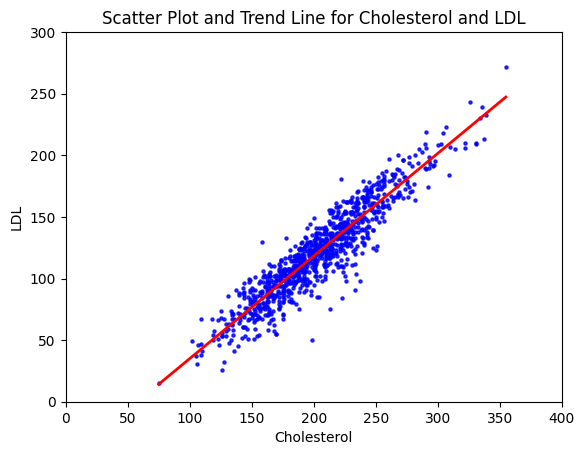

In [180]:
# 산점도와 추세선 그리기
sns.regplot(x='cholesterol', y='LDL', data=df,
            scatter_kws={'color': 'blue', 's': 5},
            line_kws={"color": "red", 'linewidth': 2},
            ci=None)

# 축 라벨 및 제목 설정
plt.title('Scatter Plot and Trend Line for Cholesterol and LDL')
plt.xlabel('Cholesterol')
plt.ylabel('LDL')
plt.xlim(0, 400)
plt.ylim(0, 300)

# 그래프 표시
plt.show()

### 2.2) multi-plots

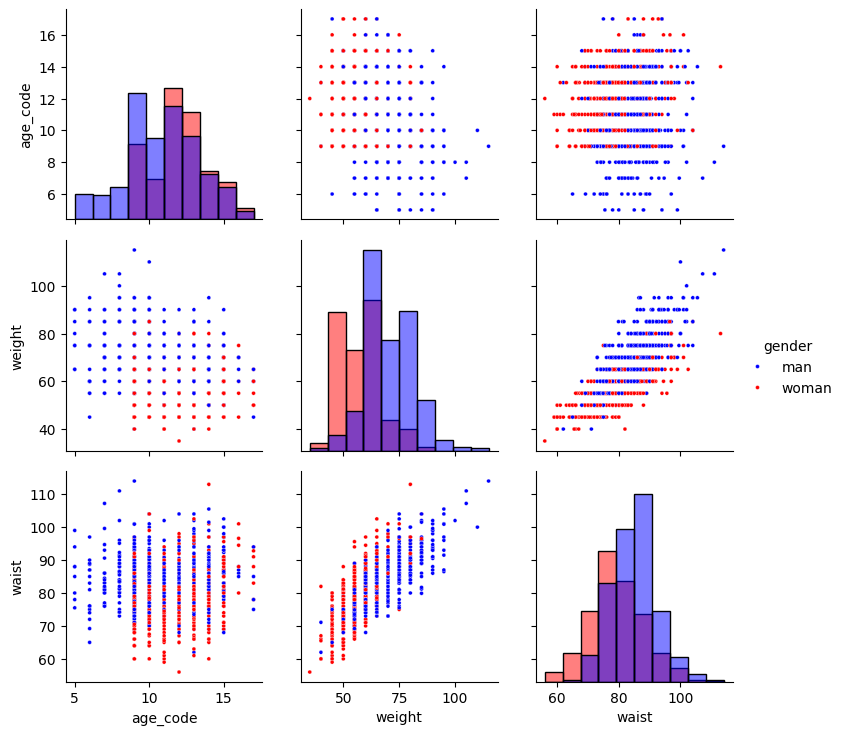

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 불러오기
new_df = df[["age_code","gender","weight","waist"]]
new_df.loc[new_df['gender'] == 1, 'gender'] = 'man'
new_df.loc[new_df['gender'] == 2, 'gender'] = 'woman'

color = {'man': 'blue', 'woman': 'red'}

pp = sns.PairGrid(new_df,hue='gender',palette=color)
pp.map_diag(sns.histplot, bins=10)
pp.map_offdiag(sns.scatterplot, s=8)
pp.add_legend()
plt.show()

몸무게와 허리둘레는 서로 비례하는 관계를 보임

남성이 여성보다 전반적으로 몸무게와 허리둘레가 큰 값을 가지는 것으로 보임

나이 코드는 여성이 남성보다 더 큰 경향을 보임

나이 코드와 몸무게, 나이 코드와 허리둘레 사이의 관계성은 떨어지는 것으로 나타남

## 3. Tips dataset

### check data

In [182]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

print(tips.shape)
print("")
print(tips.columns)
print("")
print(tips.head())

(244, 7)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### 3) bubble chart

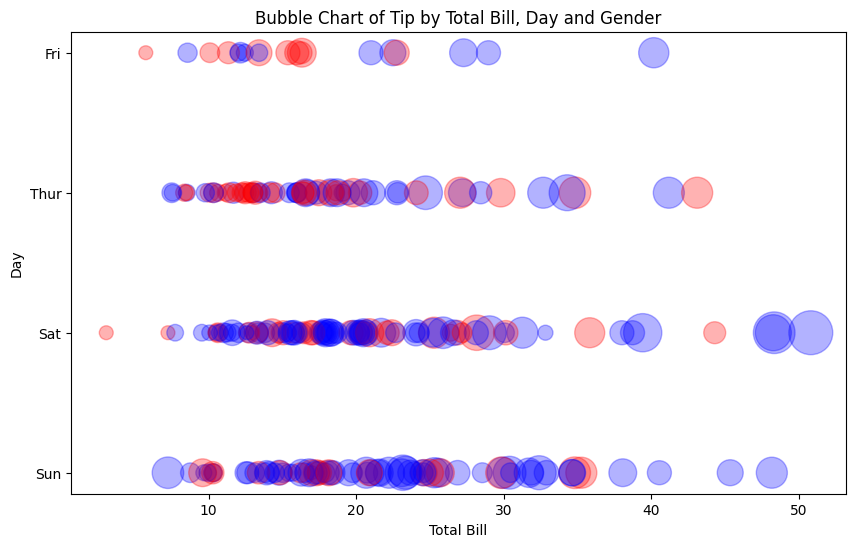

In [183]:
# 항목 추출
total_bill = tips['total_bill']
gender = tips['sex']
day = tips['day']
tip = tips['tip']

# 버블 크기 지정
bubble_sizes = tip * 100

# 버블 차트 구성
color = {'Male': 'blue', 'Female': 'red'}
gender_color = tips['sex'].map(color)

plt.figure(figsize=(10, 6))
plt.scatter(total_bill, day, s = bubble_sizes, c = gender_color, alpha=0.3)
plt.xlabel('Total Bill')
plt.ylabel('Day')
plt.title('Bubble Chart of Tip by Total Bill, Day and Gender')
plt.show()

In [184]:
print(len(tips['day'].unique()))
print(tips['day'].unique())

4
['Sun' 'Sat' 'Thur' 'Fri']


## 4. Korea Income dataset

### check data

In [243]:
income = pd.read_excel(income_dir)
print(income.shape)
print("")
print(income.columns)
print("")
income.head(10)

(17, 7)

Index(['시도별', '1인당지역내총생산', '15세이상인구', '영재교육기관', '취업비율', '평균연령', '퇴직인구'], dtype='object')



,시도별,1인당지역내총생산,15세이상인구,영재교육기관,취업비율,평균연령,퇴직인구
0,서울특별시,51612,8458,140,63.5,42.0,3061
1,부산광역시,31611,2934,66,52.6,41.6,861
2,대구광역시,26736,2075,169,56.0,41.4,599
3,인천광역시,35295,2605,207,64.2,41.0,717
4,광주광역시,30900,1280,30,62.0,40.8,320
5,대전광역시,33682,1291,100,62.0,41.8,377
6,울산광역시,77511,957,19,65.9,41.4,249
7,세종특별자치시,37875,319,28,72.9,40.4,95
8,경기도,39969,11939,172,68.7,40.5,2660
9,강원도,34426,1325,26,62.7,41.7,815


### 4. tree map

In [250]:
import plotly.express as px
import numpy as np

fig = px.treemap(income, path=['시도별'], values='15세이상인구', color='1인당지역내총생산',
                 hover_data=['영재교육기관', '취업비율', '평균연령', '퇴직인구'],
                 color_continuous_scale='RdBu',
                 title='Population and Average Income by Region in Korea')

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()